<a href="https://colab.research.google.com/github/ozlemsavran/KNN-Trial/blob/main/knn_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [6]:
df=pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [9]:
# Replace zero insulin values with the median of non-zero values
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'][df['Insulin'] != 0].median())


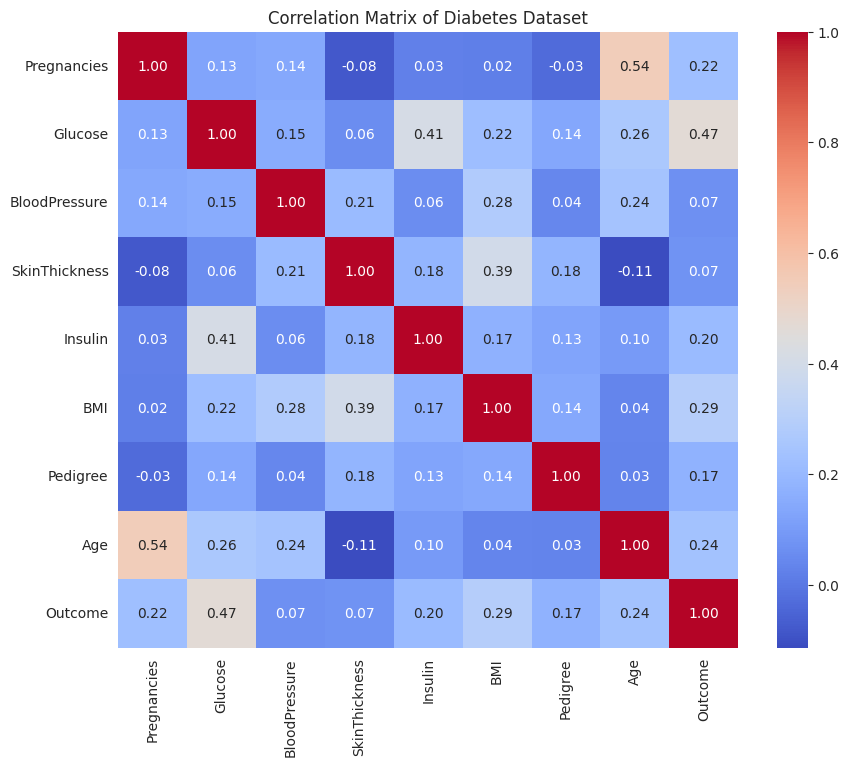

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

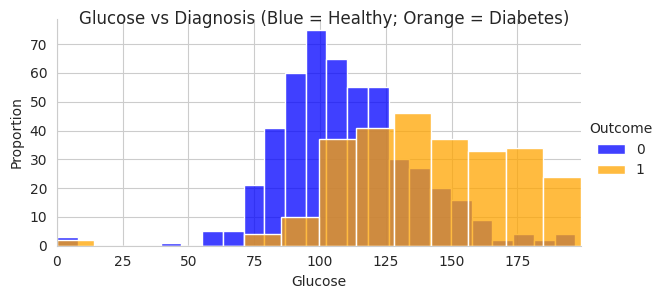

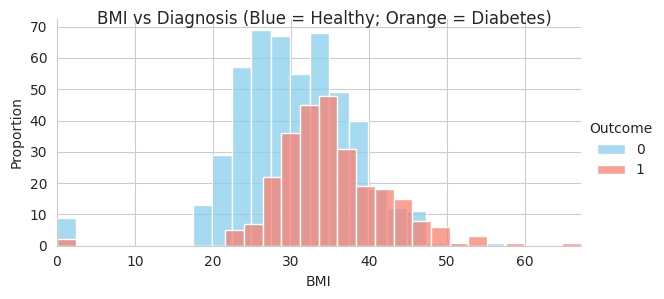

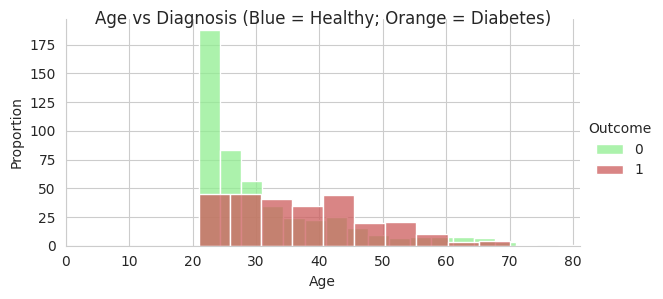

In [13]:
def plotHistogram(values,label,feature,title, palette='viridis'):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2, palette=palette)
    plotOne.map(sns.histplot,feature,kde=False) # Changed distplot to histplot
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()

plotHistogram(df,"Outcome",'Glucose','Glucose vs Diagnosis (Blue = Healthy; Orange = Diabetes)', palette=['blue', 'orange'])
plotHistogram(df,"Outcome",'BMI','BMI vs Diagnosis (Blue = Healthy; Orange = Diabetes)', palette=['skyblue', 'salmon'])
plotHistogram(df,"Outcome",'Age','Age vs Diagnosis (Blue = Healthy; Orange = Diabetes)', palette=['lightgreen', 'indianred'])

In [33]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [40]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

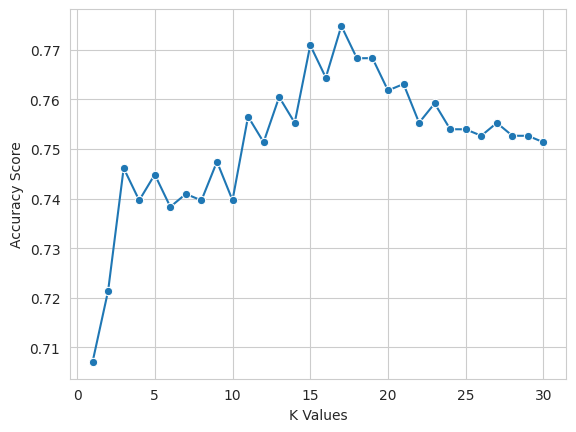

In [41]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")